# 評估分類模型

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

## 使用邏輯式迴歸產生分類結果

In [3]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
predicted = clf.predict(iris.data)

In [9]:
sum(predicted == iris.target) / len(iris.target)

0.95999999999999996

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, iris.target)

0.95999999999999996

In [11]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(iris.target, predicted)
m

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

## 使用SVM 產生分類結果

In [13]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear') 
clf2.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
predicted2 = clf2.predict(iris.data)

In [15]:
from sklearn.metrics import confusion_matrix
m2 = confusion_matrix(iris.target, predicted2)
m2

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

## 視覺化混淆矩陣(Confusion Matrix)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


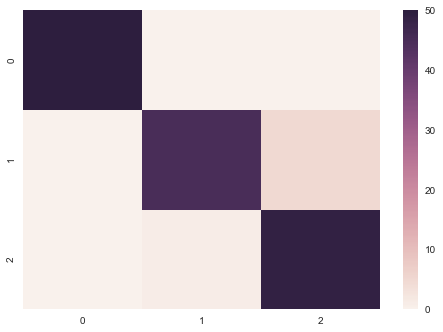

In [16]:
%pylab inline
import seaborn
seaborn.heatmap(m)

## 產生Classfication Report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(predicted , iris.target))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.90      0.98      0.94        46
          2       0.98      0.91      0.94        54

avg / total       0.96      0.96      0.96       150



## 交叉驗證

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
iris.data.shape

(150, 4)

In [24]:
iris.target.shape

(150,)

## Holdout 驗證

In [64]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, test_size = 0.33, random_state = 123)

In [65]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [66]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
predicted = clf.predict(test_X)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted, test_y)

array([[20,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 17]])

## KFold Cross Validation

In [43]:
from sklearn.model_selection import KFold
kf = KFold(n_splits= 10)
for train, test in kf.split(iris.data, iris.target):
    #train_X = iris.data[train]
    #train_y = iris.target[train]
    #test_X  = iris.data[test]
    #test_y  = iris.target[test]
    train_X, train_y, test_X, test_y = iris.data[train], iris.target[train], iris.data[test], iris.target[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    print(accuracy_score(predicted, test_y))

1.0
1.0
1.0
1.0
0.933333333333
0.8
1.0
0.866666666667
0.8
1.0


In [46]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
acc = cross_val_score(clf, X=iris.data, y= iris.target, cv= 10)
print(acc)

print(acc.mean())
print(acc.std())


[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  1.          1.          1.        ]
0.96
0.0442216638714


## 留一驗證

In [47]:
from sklearn.model_selection import LeaveOneOut

res = []
loo = LeaveOneOut()

X = iris.data
y = iris.target
for train, test in loo.split(X, y):
    train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    res.extend((predicted == test_y).tolist())
sum(res)

144

## ROC Curve

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)
#clf.predict_proba(iris.data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[50:150,]
iris.target[50:150]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [67]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 123)

In [68]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [69]:
probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
probas_[:, 1]

array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])

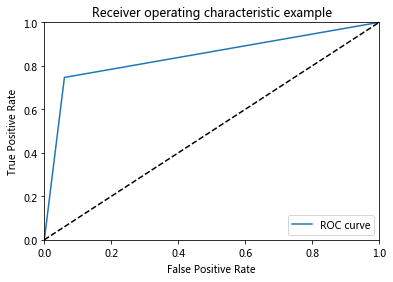

In [71]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## 計算 Area Under Curve (AUC)

In [61]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.840701754386


## 比較不同學習模型

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier(n_estimators=1000)
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

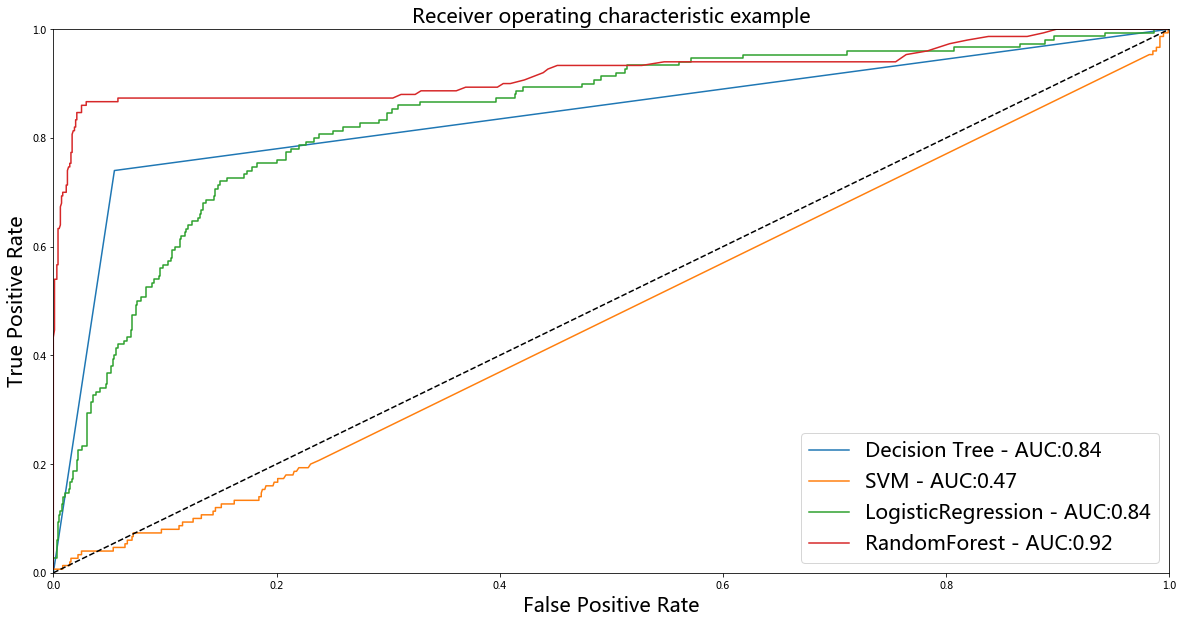

In [63]:
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()


## 客戶流失分析

In [1]:
import pandas
customer = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col = 0)

In [2]:
customer.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### Data Preprocessing

In [3]:
del customer['state']
del customer['account_length']
del customer['area_code']

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 17 columns):
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls                 3333 non-null int64
total_intl_charge                3333 non-null float64
number_customer_service_calls    3333 non-null int64
churn                      

In [5]:
international_plan = pandas.get_dummies(customer['international_plan'])
del international_plan['no']
international_plan.columns = ['international_plan_y']
international_plan.head()

,international_plan_y
1,0
2,0
3,0
4,1
5,1


In [6]:
voice_mail_plan = pandas.get_dummies(customer['voice_mail_plan'])
del voice_mail_plan['no']
voice_mail_plan.columns = ['voice_mail_plan_y']
voice_mail_plan.head()

,voice_mail_plan_y
1,1
2,1
3,0
4,0
5,0


In [7]:
customer_feature = pandas.concat([customer, international_plan, voice_mail_plan], axis = 1)
del customer_feature['international_plan']
del customer_feature['voice_mail_plan']
del customer_feature['churn']
customer_feature.head()
X= customer_feature

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(customer['churn'])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 機器學習分析

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 123)

clf = DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### 驗證結果

In [10]:
predicted = clf.predict(test_X)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, test_y)

0.90727272727272723

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted, test_y)

array([[894,  39],
       [ 56, 111]])

### 比較不同模型

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True, kernel='linear')
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier(n_estimators=1000)
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [ ]:
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()


### 手動產生 ROC Curve

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 123)

clf = LogisticRegression()
clf.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
clf.predict_proba(test_X)

array([[ 0.40401023,  0.59598977],
       [ 0.88138492,  0.11861508],
       [ 0.96272308,  0.03727692],
       ..., 
       [ 0.91525876,  0.08474124],
       [ 0.96820694,  0.03179306],
       [ 0.88494329,  0.11505671]])

In [17]:
clf.predict(test_X)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix

tpr_ary = []
fpr_ary = []
for thresh in range(0,10,1):
    boolean = clf.predict_proba(test_X)[:,1] > thresh * 0.1
    #boolean[boolean == True] = 1
    #boolean[boolean == False] = 0
    predicted = boolean.astype(int)
    cm = confusion_matrix(predicted, test_y)
    tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    tpr = tp  / (tp + fn)
    fpr = fp  / (tn + fp)
    tpr_ary.append(tpr)
    fpr_ary.append(fpr)
    

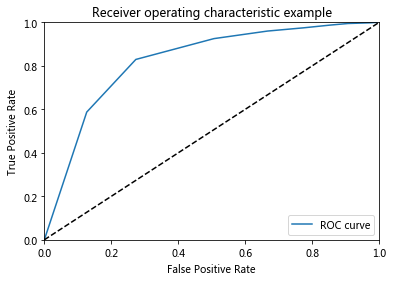

In [38]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# 非監督式學習

## 資料分群

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()

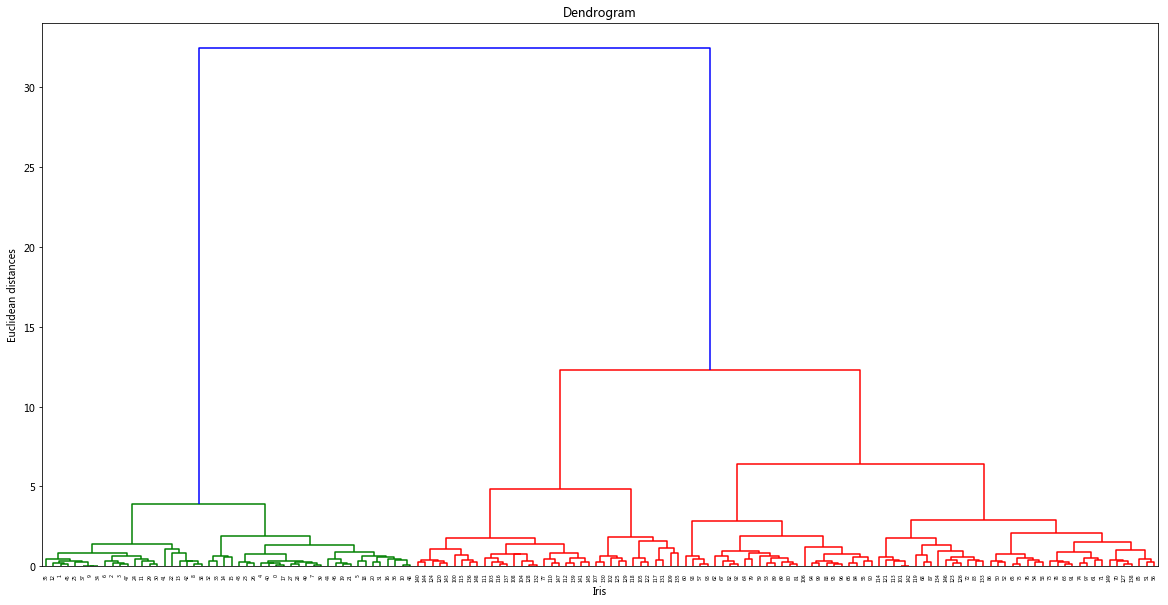

In [78]:
import scipy.cluster.hierarchy as sch
#sch.dendrogram(iris.data)
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
dendromgram = sch.dendrogram(sch.linkage(iris.data, method='ward'))
#plt.figure(figsize=[20,10])
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.show()


In [47]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(iris.data)

In [49]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

## 分群結果

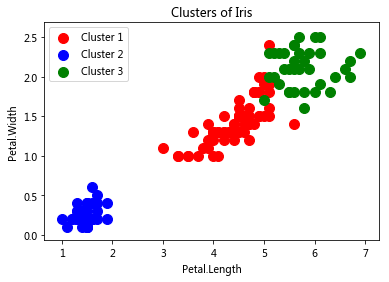

In [50]:
plt.scatter(iris.data[y_hc == 0, 2], iris.data[y_hc == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_hc == 1, 2], iris.data[y_hc == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_hc == 2, 2], iris.data[y_hc == 2, 3], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()

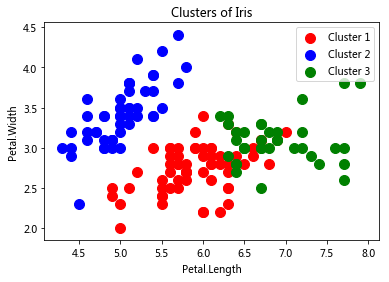

In [79]:
plt.scatter(iris.data[y_hc == 0, 0], iris.data[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_hc == 1, 0], iris.data[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_hc == 2, 0], iris.data[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()

## 降低維度

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iris.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
X = pca.fit_transform(iris.data)

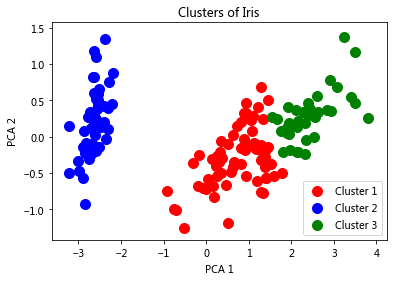

In [87]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters of Iris')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## 實際結果

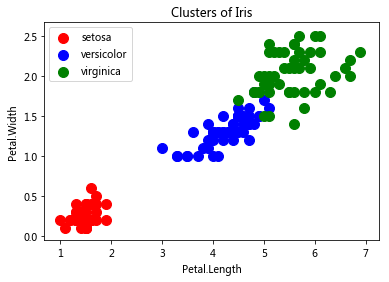

In [52]:
plt.scatter(iris.data[iris.target == 0, 2], iris.data[iris.target == 0, 3], s = 100, c = 'red', label = 'setosa')
plt.scatter(iris.data[iris.target == 1, 2], iris.data[iris.target == 1, 3], s = 100, c = 'blue', label = 'versicolor')
plt.scatter(iris.data[iris.target == 2, 2], iris.data[iris.target == 2, 3], s = 100, c = 'green', label = 'virginica')

plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()

## KMeans 分群

In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=123)
y_kemans = kmeans.fit_predict(iris.data)

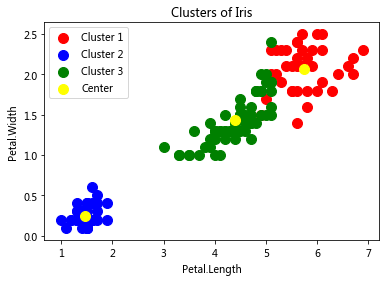

In [96]:
plt.scatter(iris.data[y_kemans  == 0, 2], iris.data[y_kemans  == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_kemans  == 1, 2], iris.data[y_kemans  == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_kemans  == 2, 2], iris.data[y_kemans  == 2, 3], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Center')
plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()

In [97]:
kmeans.cluster_centers_

array([[ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]])

## 根據客戶資料分群

In [100]:
import pandas
dataset = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customers.csv')

In [108]:
X = dataset.iloc[:,3:5].values

In [111]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [112]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4])

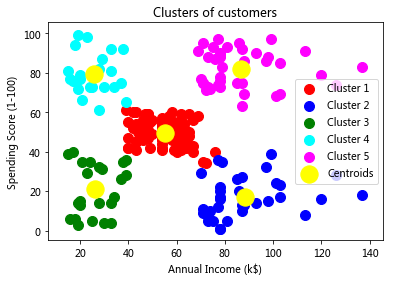

In [113]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [114]:
kmeans.inertia_

44448.455447933709

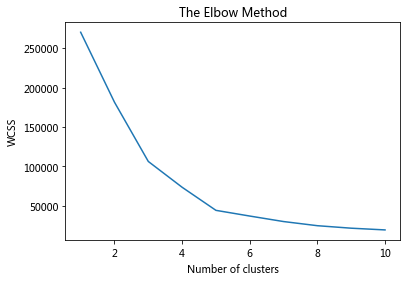

In [115]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [116]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_kmeans))


Silhouette Coefficient: 0.554


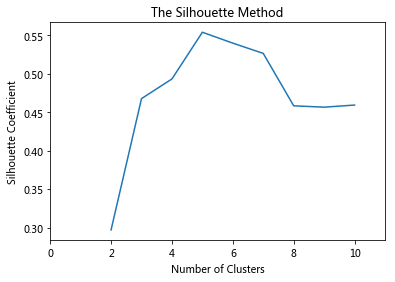

In [117]:
import matplotlib.pyplot as plt
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    sil.append(metrics.silhouette_score(X, y_kmeans))
plt.plot(range(2, 11), sil)
plt.xlim([0,11])
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()


## 比較不同的分群方式

In [118]:
# ward
ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_ward = ward.fit_predict(X)

#complete
complete = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_complete = complete.fit_predict(X)

# kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [119]:
for est, title in zip([y_ward,y_complete, y_kmeans], ['ward', 'complete', 'kmeans']):
    print(title, metrics.silhouette_score(X, est))

ward 0.552994595515
complete 0.552994595515
kmeans 0.553931997445


## DBSCAN

In [120]:
import requests
res = requests.get('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/handwriting.png')
with open('handwriting.png', 'wb') as f:
    f.write(res.content)

In [123]:
from PIL import Image
img = Image.open('data/handwriting.png')
img

In [135]:
img2 = img.rotate(-90).convert("L")
img2

In [136]:
import numpy as np
imgarr = np.array(img2)
#imgarr

In [137]:
from sklearn.preprocessing import binarize
imagedata = np.where(1- binarize(imgarr, 0) == 1)
#imagedata

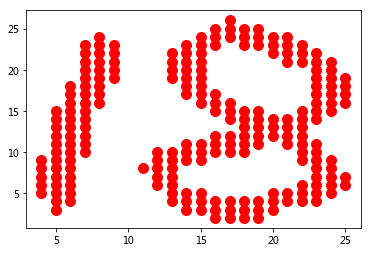

In [138]:
import matplotlib.pyplot as plt
plt.scatter(imagedata[0], imagedata[1], s = 100, c = 'red', label = 'Cluster 1')
plt.show()

In [143]:
X =np.column_stack([imagedata[0],imagedata[1]])
X[0:3]

array([[4, 5],
       [4, 6],
       [4, 7]], dtype=int64)

In [144]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

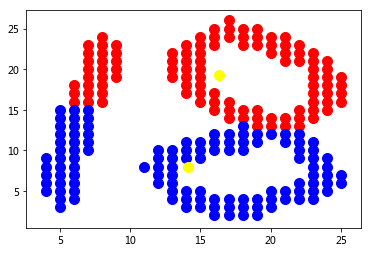

In [149]:
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Center')
plt.show()

In [150]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1, min_samples=3)
y_dbs = dbs.fit_predict(X)

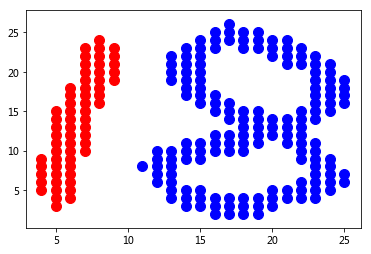

In [152]:
import matplotlib.pyplot as plt
plt.scatter(X[y_dbs==0,0], X[y_dbs==0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbs==1,0], X[y_dbs==1,1], s = 100, c = 'blue', label = 'Cluster 2')

plt.show()

## 文章分群

### 資料蒐集

In [162]:
def getDetial(url):
    res = requests.get(url)
    soup  = BeautifulSoup(res.text, 'html.parser')
    return soup.select('#summary')[0].text

In [165]:
import requests
from bs4 import BeautifulSoup
news = []
domain = 'http://www.appledaily.com.tw'
for page in range(1,11):
    res = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/{}'.format(page))
    soup  = BeautifulSoup(res.text, 'html.parser')    
    for link in soup.select('.rtddt a'):
        dic  = {}
        dic['link']     = domain + link['href']
        dic['category'] = link.select('h2')[0].text
        dic['title']    = link.select('h1')[0].text
        dic['content']  = getDetial(dic['link'])
        news.append(dic)

### 資料儲存

In [166]:
import pandas
df = pandas.DataFrame(news)
df.head()

,category,content,link,title
0,政治,今年國慶籌委會決定恢復停辦兩年的國慶煙火和停辦6年的國慶晚會，預估總花費為5385萬元。親民...,http://www.appledaily.com.tw/realtimenews/arti...,明年國慶預算10年最高 陳怡潔：好大喜功(0)
1,體育,Lamigo桃猿本周的先發輪值，將可能大搬風，除了9月6日周三對戰統一獅，確定由賽格威先發之...,http://www.appledaily.com.tw/realtimenews/arti...,猿隊先發輪值缺2人 二軍土投待命支援(0)
2,3C,Lenovo旗下原先高階的Moto X系列手機，在去年更高規的Z系列出世後，X系列以搭載中階...,http://www.appledaily.com.tw/realtimenews/arti...,【德國IFA直擊】Moto X4質感佳 ...(11)
3,生活,台北市迪化街是南北貨聚集地，也是頗富盛名的歷史老街。由於近年來觀光客倍增，北市交通局規畫從今...,http://www.appledaily.com.tw/realtimenews/arti...,迪化街人行徒步區今試辦 遊客店家兩樣情 (0)
4,政治,（更新：增加影片）島國前進發起人林飛帆今天參加時代力量台南黨部成立大會，他意有所指表示，台南...,http://www.appledaily.com.tw/realtimenews/arti...,林飛帆的市長西瓜說 民進黨：真心換絕情(1438)


In [167]:
import sqlite3 as lite
with lite.connect('news.sqlite') as db:
    df.to_sql('news', con = db)

In [169]:
import sqlite3 as lite
with lite.connect('news.sqlite') as db:
    df = pandas.read_sql_query('select * from news', con = db)

### 新聞斷詞

In [171]:
! pip install jieba

In [175]:
import jieba
print(' '.join(jieba.cut(df.ix[0]['content'])))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 2.523 seconds.
Prefix dict has been built succesfully.


今年 國慶 籌委會 決定 恢 復 停辦 兩年 的 國慶煙火 和 停辦 6 年 的 國慶 晚會 ， 預估 總花費 為 5385 萬元 。 親民黨 立委 陳 怡潔 質疑 ， 今年 原編列 2023 萬元 ， 為 辦 晚會 和 煙火 超支 3000 萬元 ， 甚至 還動 用到 行政院 的 第二 預備 金 ， 而 在 景氣 未 復 甦 、 國家 財政困 難 的 前提 下 ， 明年 國慶 預算竟 又 比 今年 高出 一倍 之多 ， 高達 4500 萬元 ， 是 10 年來 最高 的 一次 。 陳 怡潔批 ， 民進 黨 不顧 民生 、 好大喜功 辦國慶 晚會 ， 只是 徒增 民眾 負擔 ， 接下 來 要面 對 2018 年 縣市 首長 選戰 ， 更 令人 不得不 質疑 ， 民進 黨 在 假國慶 之名 、 行造勢 之實 。 陳 怡潔 說 ， 民進 黨過 去 無論 是 在野 或是 執政 ， 慶祝國慶時 一向 都 很 低調 ， 現在 卻 很 「 反常 」 擴編國慶 活動 的 預算 ， 讓 人質 疑民進 黨 的 目的 ， 國慶 晚會 將辦 在 台 中 ， 而煙 火要 辦 在 台東 ， 民進 黨 除了 用 前瞻 計畫 預算 綁 樁 ， 是否 又 要 利用 國慶 晚會 造勢 ？ 相信 大家 都 看得出 這樣 的 國慶 盛典 到底 是 為 了 民進 黨 自己 舉辦 ， 還是 為 了 民眾 ？ 實在 是 非常 諷刺 。 （ 余祥 ／ 台北 報導 ）


In [179]:
contents = []
titles   = []
for news in df.iterrows():
    contents.append(' '.join(jieba.cut(news[1].content)))
    titles.append(news[1].title)

In [182]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer()
m = c.fit_transform(contents)

In [187]:
from sklearn.metrics.pairwise import cosine_similarity
X = cosine_similarity(m)

In [188]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [199]:
import numpy as np
ntitles = np.array(titles) 
ntitles[y_kmeans == 6].tolist()

['【不斷更新】引爆6.3強震\u3000北韓：成功試...(195445)',
 '文在寅敦促嚴懲北韓\u3000考慮部署美軍最強力戰...(31)',
 '北韓核原料哪裡來？\u3000原來有強國國企幫忙\u3000(4002)',
 '1分鐘看懂氫彈\u3000其威力大過原子彈(6007)',
 '北韓人工地震威力\u3000為去年核試的9.8倍(2018)',
 '北韓豐溪里5次核試\u3000威力一次比一次強(13265)',
 '估錯了？\u3000外界普遍料北韓「國慶日」才核試(4706)',
 '北韓疑核試爆\u3000總統緊急召開國家安全會議因...(11039)',
 '\u200b北韓試爆\u3000威力相當於100萬噸黃色炸藥(14519)',
 '【氫彈片】北韓宣稱擁氫彈彈頭\u3000可搭載洲際...(45336)',
 '北韓愛搗「彈」\u3000川普安倍又通電話(7894)']

### 新聞分類

In [206]:
from collections import Counter
c = Counter(catetories)
c

Counter({'3C': 2,
         '副刊': 1,
         '動物': 1,
         '國際': 30,
         '地產': 7,
         '壹週刊': 2,
         '娛樂': 20,
         '政治': 29,
         '時尚': 5,
         '生活': 74,
         '社會': 58,
         '論壇': 11,
         '財經': 20,
         '體育': 40})

In [211]:
contents   = []
titles     = []
catetories = []
for news in df.iterrows():
    if news[1].category in ['社會', '體育', '國際']:
        contents.append(' '.join(jieba.cut(news[1].content)))
        titles.append(news[1].title)
        catetories.append(news[1].category)

In [215]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer()
X = c.fit_transform(contents)

In [216]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(catetories)
y

array([2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0,
       1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2,
       2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2], dtype=int64)

In [224]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 123)

In [225]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_X,train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [226]:
predicted = clf.predict(test_X)

In [227]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted, test_y)

array([[ 6,  0,  0],
       [ 1, 18,  0],
       [ 2,  0, 16]])